# UK Accidents Classification - Part 2

## Table of Contents

1. Data Loading and Environment Setup
2. Data Transformations
3. Modelling
4. Models Evaluation
5. Conclusion

## 2. Data Loading and Environment Setup

We will carry forward from the group segment of the assignment and use the initially cleaned and transformed datasets

In [1]:
# import the pre-requisite libraries

# base libraries
import os
import time


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Data manipulation
import numpy as np
import pandas as pd

# do not print warnings
import warnings
warnings.filterwarnings("ignore")

#Global set to view all columns
pd.set_option('display.max_columns', None)

# intel extension for faster processing
from sklearnex import patch_sklearn
patch_sklearn()

from IPython.display import display

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
Start_time = time.time()

In [3]:
# change the working directory
os.chdir(r'M:\Msc Business Analytics\Semester 2\Big Data for Decision Making\Individual Assignment\Datasets')

# import the files as dataframes
x_train = pd.read_csv('x_train.csv', header=0, index_col=0)
x_test = pd.read_csv('x_test.csv', header=0, index_col=0)
y_train = pd.read_csv('y_train.csv', header=0, index_col=0)
y_test = pd.read_csv('y_test.csv', header=0, index_col=0)

In [4]:
# inspect the x_train set
x_train.head()

,age_of_driver,engine_capacity_cc,age_of_vehicle,age_of_casualty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,A(M),B,C,Motorway,Unclassified,30.0,40.0,50.0,60.0,70.0,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds,Flood over 3cm. deep,Frost or ice,Snow,Wet or damp,Bus or coach (17 or more pass seats),Car,Electric motorcycle,Goods 7.5 tonnes mgw and over,Goods over 3.5t. and under 7.5t,Goods vehicle - unknown weight,Minibus (8 - 16 passenger seats),Mobility scooter,Motorcycle 125cc and under,Motorcycle 50cc and under,Motorcycle over 125cc and up to 500cc,Motorcycle over 500cc,Other vehicle,Pedal cycle,Ridden horse,Taxi/Private hire car,Tram,Van / Goods 3.5 tonnes mgw or under,Male,Less deprived 10-20%,Less deprived 20-30%,Less deprived 30-40%,Less deprived 40-50%,More deprived 10-20%,More deprived 20-30%,More deprived 30-40%,More deprived 40-50%,Most deprived 10%,Small town,Urban area,Passenger,Pedestrian,Bus or coach occupant (17 or more pass seats),Car occupant,Cyclist,Electric motorcycle rider or passenger,Goods vehicle (7.5 tonnes mgw and over) occupant,Goods vehicle (over 3.5t. and under 7.5t.) occupant,Horse rider,Minibus (8 - 16 passenger seats) occupant,Mobility scooter rider,Motorcycle 125cc and under rider or passenger,Motorcycle 50cc and under rider or passenger,Motorcycle over 125cc and up to 500cc rider or passenger,Motorcycle over 500cc rider or passenger,Other vehicle occupant,Taxi/Private hire car occupant,Tram occupant,Van / Goods vehicle (3.5 tonnes mgw or under) occupant,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.544983,0.112928,1.254158,0.631427,2.473907,-0.39562,-0.364123,-0.421269,-0.412222,-0.416358,-0.067396,-0.377478,-0.224703,-0.250827,-0.651229,-1.053392,-0.336665,4.051242,-0.454343,-0.335014,-0.482452,-0.081494,-0.256149,0.609005,-2.178610,-0.073737,-0.13638,-0.111927,2.702860,-0.041367,-0.068623,-0.036248,-0.1162,-0.064972,1.605361,-0.131454,0.574405,-0.015274,-0.127083,-0.068987,-0.039903,-0.045161,-0.029714,-0.166959,-0.074164,-0.088021,-0.156095,-0.068403,-0.259277,-0.020328,-0.136949,-0.010587,-0.23618,0.836790,-0.310977,-0.320142,-0.327254,-0.335889,2.846435,-0.343233,-0.343072,-0.339197,-0.368347,-0.329385,0.542695,-0.544115,-0.259849,-0.122078,0.725970,-0.343916,-0.019105,-0.069443,-0.048203,-0.024114,-0.043629,-0.036392,-0.210966,-0.092725,-0.110667,-0.195031,-0.060774,-0.12124,-0.007909,-0.180015,-0.090043,-0.07559,-0.07085,-0.066324,-0.090768,-0.14077,-0.216192,-0.268545,-0.222396,-0.223221,-0.240721,-0.256706,-0.260884,-0.266307,-0.291717,3.276572,-0.318134,-0.276922,-0.230665,-0.193666,-0.170298,-0.157994,-0.13495
1,0.242464,0.112928,0.655658,-0.329060,-0.404219,-0.39562,2.746327,-0.421269,-0.412222,-0.416358,-0.067396,-0.377478,-0.224703,-0.250827,-0.651229,-1.053392,-0.336665,-0.246838,-0.454343,2.984948,-0.482452,-0.081494,3.903984,-1.642023,-2.178610,-0.073737,-0.13638,-0.111927,2.702860,-0.041367,-0.068623,-0.036248,-0.1162,-0.064972,1.605361,-0.131454,0.574405,-0.015274,-0.127083,-0.068987,-0.039903,-0.045161,-0.029714,-0.166959,-0.074164,-0.088021,-0.156095,-0.068403,-0.259277,-0.020328,-0.136949,-0.010587,-0.23618,0.836790,-0.310977,-0.320142,-0.327254,-0.335889,-0.351317,-0.343233,-0.343072,2.948141,-0.368347,-0.329385,-1.842655,-0.544115,-0.259849,-0.122078,0.725970,-0.343916,-0.019105,-0.069443,-0.048203,-0.024114,-0.043629,-0.036392,-0.210966,-0.092725,-0.110667,-0.195031,-0.060774,-0.12124,-0.007909,-0.180015,-0.090043,-0.07559,-0.07085,-0.066324,-0.090768,-0.14077,-0.216192,-0.268545,-0.222396,-0.223221,-0.240721,-0.256706,-0.260884,-0.266307,-0.291717,-0.305197,-0.318134,-0.276922,-0.230665,-0.193666,-0.170298,-0.157994,-0.13495
2,-1.088621,-0.157877,-0.142343,-1.022746,-0.404219,-0.39562,-0.364123,2.373779,-0.412222,-0.416358,-0.067396,-0.377478,-0.224703,-0.250827,1.535559,0.949314,-0.3

In [5]:
# inspect data types and potential null-values
print(x_train.shape, y_train.shape)

(767424, 107) (767424, 1)


We can see that we're working with over 700,000 records of accidents and 107 features. It is likely that this would lead to lenghty training times if untreated, therefore we'll take measures to make our data and training more manageable.


## 3. Data Reduction

We'll be reducing the size of our training data to make training times more manageable for our multiple models.

1. Feature selection using the ANOVA method to reduce number of columns
2. Taking a smaller sample (records) of our data to reduce the number of rows

*We do not use any feature extraction methods such as Linear Discriminant Analysis as we would like to identify feature importance after building our models.*

In [6]:
# transform the label for our Fatal variable to make it more intuitive
y_train.replace([1,0], ['Fatal','Non-Fatal'], inplace=True)
y_test.replace([1,0], ['Fatal', 'Non-Fatal'], inplace=True)

### 3.1 Feature Selection using ANOVA

In [7]:
# import the feature selection libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# instantiate class, get the 25 best features based on the ANOVA F-score for classification
selector = SelectKBest(f_classif, k=30)

# fit the selector onto our training dataset
selector.fit(x_train, y_train)

# we get the columns we want to keep and create a new dataframe with those only
columns =  selector.get_support(indices=True)
x_train_new = x_train.iloc[:,columns]
x_test_new = x_test.iloc[:,columns]

print(x_train_new.shape, x_test_new.shape)

(767424, 30) (191929, 30)


In [8]:
# inspect the new dataset
x_train_new.head()

,age_of_driver,engine_capacity_cc,age_of_casualty,Sunday,Motorway,Unclassified,30.0,50.0,60.0,70.0,Darkness - no lighting,Daylight,Car,Goods 7.5 tonnes mgw and over,Motorcycle over 500cc,Pedal cycle,Male,Small town,Urban area,Pedestrian,Car occupant,Cyclist,Goods vehicle (7.5 tonnes mgw and over) occupant,Motorcycle 125cc and under rider or passenger,Motorcycle over 500cc rider or passenger,01,03,05,08,22
0,0.544983,0.112928,0.631427,-0.364123,-0.250827,-0.651229,-1.053392,4.051242,-0.454343,-0.335014,-0.256149,0.609005,0.574405,-0.127083,-0.156095,-0.259277,0.836790,-0.329385,0.542695,-0.259849,0.725970,-0.343916,-0.069443,-0.210966,-0.195031,-0.090043,-0.07085,-0.090768,-0.268545,-0.157994
1,0.242464,0.112928,-0.329060,2.746327,-0.250827,-0.651229,-1.053392,-0.246838,-0.454343,2.984948,3.903984,-1.642023,0.574405,-0.127083,-0.156095,-0.259277,0.836790,-0.329385,-1.842655,-0.259849,0.725970,-0.343916,-0.069443,-0.210966,-0.195031,-0.090043,-0.07085,-0.090768,-0.268545,-0.157994
2,-1.088621,-0.157877,-1.022746,-0.364123,-0.250827,1.535559,0.949314,-0.246838,-0.454343,-0.335014,-0.256149,0.609005,-1.740931,-0.127083,-0.156095,3.856883,0.836790,-0.329385,0.542695,-0.259849,-1.377467,-0.343916,-0.069443,4.740108,-0.195031,-0.090043,-0.07085,-0.090768,-0.268545,-0.157994
3,2.360099,-0.429363,2.232240,-0.364123,-0.250827,-0.651229,-1.053392,-0.246838,2.200982,-0.335014,-0.256149,0.609005,0.574405,-0.127083,-0.156095,-0.259277,0.836790,-0.329385,-1.842655,-0.259849,0.725970,-0.343916,-0.069443,-0.210966,-0.195031,-0.090043,-0.07085,-0.090768,-0.268545,-0.157994
4,2.057580,-0.155836,2.018798,-0.364123,-0.250827,-0.651229,-1.053392,-0.246838,2.200982,-0.335014,3.903984,-1.642023,0.574405,-0.127083,-0.156095,-0.259277,-1.195043,-0.329385,0.542695,-0.259849,0.725970,-0.343916,-0.069443,-0.210966,-0.195031,-0.090043,-0.07085,-0.090768,-0.268545,-0.157994


### 3.2 Selecting Smaller Samples for Model Training

Even with smaller feature count, we have over 700,000 records to train on multiple ML models, which would take a significant amount of time. As such we will further reduce the size of our dataframe

In [11]:
# first we undersample the data to help both improve class imbalance and reduce training size
# import the imbalanced learn, Random Under Sampling Method
from imblearn.under_sampling import RandomUnderSampler

# Instantiate undersampler with Fatal cases to be equal to Majority Class
rus_sampler = RandomUnderSampler(random_state=7, sampling_strategy=1)

# fit and transform the original training dataset
x_train, y_train = rus_sampler.fit_resample(x_train_new, y_train)

print(x_train.shape, y_train.shape)

(31144, 30) (31144, 1)


In [12]:
x_train.head()

,age_of_driver,engine_capacity_cc,age_of_casualty,Sunday,Motorway,Unclassified,30.0,50.0,60.0,70.0,Darkness - no lighting,Daylight,Car,Goods 7.5 tonnes mgw and over,Motorcycle over 500cc,Pedal cycle,Male,Small town,Urban area,Pedestrian,Car occupant,Cyclist,Goods vehicle (7.5 tonnes mgw and over) occupant,Motorcycle 125cc and under rider or passenger,Motorcycle over 500cc rider or passenger,01,03,05,08,22
0,0.847503,0.055093,1.485194,-0.364123,-0.250827,-0.651229,-1.053392,-0.246838,2.200982,-0.335014,-0.256149,0.609005,0.574405,-0.127083,-0.156095,-0.259277,0.836790,-0.329385,0.542695,-0.259849,-1.377467,-0.343916,-0.069443,-0.210966,-0.195031,-0.090043,-0.07085,-0.090768,-0.268545,-0.157994
1,0.000449,0.782456,1.378473,2.746327,-0.250827,-0.651229,0.949314,-0.246838,-0.454343,-0.335014,-0.256149,-1.642023,0.574405,-0.127083,-0.156095,-0.259277,0.836790,-0.329385,0.542695,-0.259849,0.725970,-0.343916,-0.069443,-0.210966,-0.195031,-0.090043,-0.07085,-0.090768,-0.268545,-0.157994
2,-0.241567,-0.313692,-1.022746,-0.364123,-0.250827,-0.651229,-1.053392,-0.246838,2.200982,-0.335014,-0.256149,0.609005,0.574405,-0.127083,-0.156095,-0.259277,-1.195043,-0.329385,0.542695,-0.259849,0.725970,-0.343916,-0.069443,-0.210966,-0.195031,-0.090043,-0.07085,-0.090768,3.723776,-0.157994
3,-1.270132,-0.298723,-1.129466,-0.364123,-0.250827,1.535559,-1.053392,-0.246838,2.200982,-0.335014,3.903984,-1.642023,0.574405,-0.127083,-0.156095,-0.259277,-1.195043,-0.329385,0.542695,-0.259849,0.725970,-0.343916,-0.069443,-0.210966,-0.195031,11.105836,-0.07085,-0.090768,-0.268545,-0.157994
4,-0.967613,3.315641,-0.702583,-0.364123,-0.250827,1.535559,0.949314,-0.246838,-0.454343,-0.335014,-0.256149,0.609005,-1.740931,-0.127083,-0.156095,-0.259277,0.836790,-0.329385,-1.842655,-0.259849,-1.377467,-0.343916,-0.069443,-0.210966,-0.195031,-0.090043,-0.07085,-0.090768,-0.268545,-0.157994


Text(0.5, 1.0, 'Distribution of Classes in the Data')

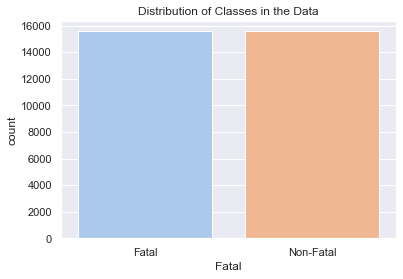

In [13]:
# set seaborn theme to be used
sns.set_theme(style='darkgrid', palette='pastel')

ax = sns.countplot(x='Fatal', data=y_train)
ax.set_title('Distribution of Classes in the Data')

In [14]:
# next we take a random sample of 30% from the dataset to further reduce the trainset

# reduce the number of training instances to half
x_train = x_train.sample(frac=0.3, random_state=7)

# filter the y training set with the same rows as the reduced x set
y_train = y_train.filter(items=x_train.index, axis=0)

In [15]:
print(x_train.shape, y_train.shape)

(9343, 30) (9343, 1)


We now have:  
- A more balanced dataset
- Smaller, more manageable dataset to train our models on (with almost 10,000 records)


## 4. Building the Models

We will build and create the following methods below.

1. Random Forests
2. Support Vector Machines
3. Logistic Regression
4. ADABoost
5. Multi-Layer Perceptron

For all of our models:

- We will use a GridSearch method to attempt to find the best hyperparameter combination
- We will use a 10 fold cross-validation strategy in the gridsearch
- Scoring will be based on the F1-Macro score.

### 4.1 The Baseline Model

We will use a simple baseline of assuming all cases fit within the majority class as our baseline model. Given we have already balanced the data, the Y_train set has equal proportions of classes. However, we understand from earlier analysis that Non-Fatal is our majority class.

In [16]:
# set the baseline prediction to be our majority class
major_class = 'Non-Fatal'

# set our prediction as an array in the same shape as the test set
# we set it at the test set as our baseline will only be used to measure accuracy
yhat_baseline = np.full((y_train.shape[0], 1), major_class)

print(yhat_baseline.shape)


(9343, 1)


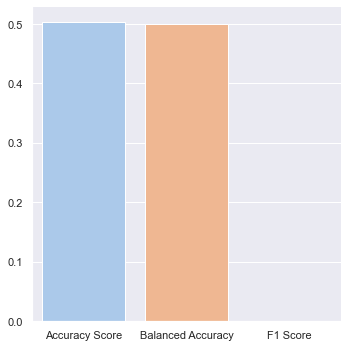

In [17]:
# now lets compute the accuracy of our predictions based on baseline
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# calculate the scores for each metric based on training dataset
Accuracy_baseline = accuracy_score(y_train, yhat_baseline, normalize=True)
Balanced_baseline = balanced_accuracy_score(y_train, yhat_baseline)
F1_baseline =  f1_score(y_train, yhat_baseline, pos_label='Fatal')

# construct a dataframe with baseline accuracy scores
baseline_metrics = pd.DataFrame({
                    'Accuracy Score': Accuracy_baseline,
                    'Balanced Accuracy': Balanced_baseline,
                    'F1 Score': F1_baseline,
                    
}, index=[0]).sort_index()


# visualize our accuracy scores
ax = sns.catplot(data=baseline_metrics, kind='bar')

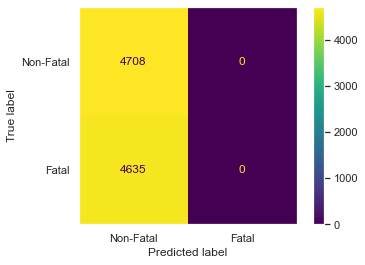

In [18]:
# plot the prediction
baseline_cm = confusion_matrix(y_train, yhat_baseline, labels=y_train.Fatal.unique())
baseline_cm_disp = ConfusionMatrixDisplay(confusion_matrix=baseline_cm, display_labels=y_train.Fatal.unique())

baseline_cm_disp.plot()
plt.grid(False)
plt.show()

The above plot illustrates the issue with using standard accuracy measures for our problem. Rather than being 'right' all or most of the time, we are more concerned with getting Fatal accidents correct more often. As we wish to take preventive measures for Fatal accidents, it's important that our metrics are also geared towards that purpose.

- We are more concerned with understanding and Predicting Fatal cases than creating a general prediction model
- With that aim in mind, metrics such as F1_Score, and Precision / Recall are much more applicable as performance evaluation metrics for this project. 
- Standard accuracy scores would provide misleading results with Class Imbalances.

In [19]:
# We define the following complementary function that will be called continously as we build our models

# define the function to print the reults of a grid search in tabular format.
def print_cv_results(grid_search, col_width=100):
    """Given a grid search object, print a table with the 
    cross-validation results
    """
    results = pd.DataFrame(grid_search.cv_results_
                             )[['params', 'mean_train_score', 'mean_test_score']]
    results["diff, %"] = 100*(results["mean_train_score"]-results["mean_test_score"]
                                                         )/results["mean_train_score"]

    pd.set_option('display.max_colwidth', col_width)
    display(results.sort_values('mean_test_score', ascending=False))

### 4.2 Random Forest

In [20]:
# import the GridSearch Class
from sklearn.model_selection import GridSearchCV
from sklearnex.ensemble import RandomForestClassifier

# build the ML pipeline
rf_classifier = RandomForestClassifier(random_state=7)

# set the different sampling and hyperparameter combinations
param_grid = [
    {
        'n_estimators': [100, 250, 500],
        'max_depth': [10, 5, None]
    },
]

# define the grid search parameters
rf_grid_search = GridSearchCV(rf_classifier, param_grid, cv=10, 
                              scoring='f1_macro',
                              return_train_score=True)

# fit and train our model based on the grid search defined above
# we fit the model on our reduced form x training set

rf_grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=7),
             param_grid=[{'max_depth': [10, 5, None],
                          'n_estimators': [100, 250, 500]}],
             return_train_score=True, scoring='f1_macro')

In [21]:
# print the results of our grid search
print_cv_results(rf_grid_search, col_width=100)

,params,mean_train_score,mean_test_score,"diff, %"
7,"{'max_depth': None, 'n_estimators': 250}",0.998275,0.728106,27.063597
8,"{'max_depth': None, 'n_estimators': 500}",0.998287,0.727679,27.107270
6,"{'max_depth': None, 'n_estimators': 100}",0.998073,0.727133,27.146296
1,"{'max_depth': 10, 'n_estimators': 250}",0.795636,0.725845,8.771829
2,"{'max_depth': 10, 'n_estimators': 500}",0.794876,0.725433,8.736237
0,"{'max_depth': 10, 'n_estimators': 100}",0.795702,0.724993,8.886433
4,"{'max_depth': 5, 'n_estimators': 250}",0.721632,0.712128,1.316938
5,"{'max_depth': 5, 'n_estimators': 500}",0.721602,0.711848,1.351741
3,"{'max_depth': 5, 'n_estimators': 100}",0.722146,0.711391,1.489425


In [22]:
# save the best logistic regression model to a variable
best_rf = rf_grid_search.best_estimator_

We can observe from the above results that overfitting increases as maximum depth increases, which is to be expected as it means the trees will split more as it fits more to the data it sees in order to reduce error. 

### 4.3 Support Vector Machines

In [23]:
# import the Support Vector Classifier
from sklearnex.svm import SVC

# instantiate the SV classifier
# we use linear kernel as this will allow us to acquire feature significance later on
svm_classifier = SVC(random_state=7, kernel='linear')


# set the different sampling and hyperparameter combinations
param_grid = [
    {
        'C': [0.1, 1, 10, 100],
    },
]

# define the grid search parameters
# we use macro scores as it does not become biased due to class imbalances.
svm_grid_search = GridSearchCV(svm_classifier, param_grid, cv=10, 
                              scoring='f1_macro',
                              return_train_score=True)


svm_grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(kernel='linear', random_state=7),
             param_grid=[{'C': [0.1, 1, 10, 100]}], return_train_score=True,
             scoring='f1_macro')

In [24]:
print_cv_results(svm_grid_search, col_width=100)

,params,mean_train_score,mean_test_score,"diff, %"
0,{'C': 0.1},0.688695,0.686397,0.333746
1,{'C': 1},0.688695,0.686397,0.333746
2,{'C': 10},0.688695,0.686397,0.333746
3,{'C': 100},0.688695,0.686397,0.333746


In [25]:
# save the best logistic regression model to a variable
best_svm = svm_grid_search.best_estimator_

We notice an interesting phenomenom in our Support Vector Classifier where the tuning of the hyperparameter does not give us any different results. Meaning that the margin for misclassifications does not matter in our model. Which is something we may need to address. Perhaps it may be a result of the linear kernel used above. We will try the same parameters with a sigmoid kernel to see if results vary

### 4.4 Logistic Regression

In [26]:
from sklearnex.linear_model import LogisticRegression

# instantiate logistic regression with l1 penalty to aid in feature selection.
l_regression = LogisticRegression(random_state=7, penalty='l1', solver='saga')

# set the different sampling and hyperparameter combinations
param_grid = [
    {   
        'C': [0.01, 0.1, 1, 10, 100],
    },
]

# define the grid search parameters
# we use macro scores as it does not become biased due to class imbalances.
lr_grid_search = GridSearchCV(l_regression, param_grid, cv=10, 
                              scoring='f1_macro',
                              return_train_score=True)


lr_grid_search.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(penalty='l1', random_state=7,
                                          solver='saga'),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100]}],
             return_train_score=True, scoring='f1_macro')

In [27]:
print_cv_results(lr_grid_search, col_width=100)

,params,mean_train_score,mean_test_score,"diff, %"
1,{'C': 0.1},0.718185,0.715926,0.314475
4,{'C': 100},0.718331,0.715703,0.365863
3,{'C': 10},0.718331,0.715491,0.395312
2,{'C': 1},0.718355,0.715165,0.444098
0,{'C': 0.01},0.712944,0.710281,0.373548


In [28]:
# save the best logistic regression model to a variable
best_lr = lr_grid_search.best_estimator_

The results of our logistic regression are also encouraging. With 71% mean test score on average and good generalization

### 4.5 ADA-Boost

In [29]:
from sklearn.ensemble import AdaBoostClassifier


# instantiate logistic regression with l1 penalty to aid in feature selection.
ada_clf = AdaBoostClassifier(random_state=7)

# set the different sampling and hyperparameter combinations
param_grid = [
    {   
        'n_estimators': [5, 10, 25, 50],
        'learning_rate': [0.01, 0.1, 0.5, 1],
    },
]

# define the grid search parameters
# we use macro scores as it does not become biased due to class imbalances.
ada_grid_search = GridSearchCV(ada_clf, param_grid, cv=10, 
                              scoring='f1_macro',
                              return_train_score=True)


ada_grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=7),
             param_grid=[{'learning_rate': [0.01, 0.1, 0.5, 1],
                          'n_estimators': [5, 10, 25, 50]}],
             return_train_score=True, scoring='f1_macro')

In [30]:
print_cv_results(ada_grid_search, col_width=100)

,params,mean_train_score,mean_test_score,"diff, %"
11,"{'learning_rate': 0.5, 'n_estimators': 50}",0.721866,0.718023,0.532334
15,"{'learning_rate': 1, 'n_estimators': 50}",0.722986,0.718019,0.687030
14,"{'learning_rate': 1, 'n_estimators': 25}",0.715967,0.714549,0.198085
10,"{'learning_rate': 0.5, 'n_estimators': 25}",0.716316,0.712589,0.520260
9,"{'learning_rate': 0.5, 'n_estimators': 10}",0.708691,0.707568,0.158454
7,"{'learning_rate': 0.1, 'n_estimators': 50}",0.704025,0.702309,0.243798
13,"{'learning_rate': 1, 'n_estimators': 10}",0.702190,0.699149,0.433073
6,"{'learning_rate': 0.1, 'n_estimators': 25}",0.687339,0.685728,0.234490
12,"{'learning_rate': 1, 'n_estimators': 5}",0.686650,0.684752,0.276333
8,"{'learning_rate': 0.5, 'n_estimators': 5}",0.683854,0.682181,0.244786


In [31]:
best_ada = ada_grid_search.best_estimator_

The best ADA boost method performs better with a higher learning rate as well as estimators count. All of our models including the best one show good generalization and good test scores

### 4.6 Multi-Layer Perceptron (Neural Network)

In [32]:
# import the MLPClassifier class
from sklearn.neural_network import MLPClassifier

# instantiate our MLPClassifier
Mlpclassifier = MLPClassifier(solver='lbfgs', random_state=7)

# define the grid search parameters
param_grid = [
    {   
        'alpha': [0.001 ,0.01, 0.1, 1],
        'activation': ['logistic', 'identity'],
    },
]

mlp_grid_search = GridSearchCV(Mlpclassifier, param_grid, cv=10, 
                              scoring='f1_macro',
                              return_train_score=True)

# fit the neural network to our data
mlp_grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=7, solver='lbfgs'),
             param_grid=[{'activation': ['logistic', 'identity'],
                          'alpha': [0.001, 0.01, 0.1, 1]}],
             return_train_score=True, scoring='f1_macro')

In [33]:
print_cv_results(mlp_grid_search, col_width=100)

,params,mean_train_score,mean_test_score,"diff, %"
7,"{'activation': 'identity', 'alpha': 1}",0.718319,0.715596,0.379099
4,"{'activation': 'identity', 'alpha': 0.001}",0.718450,0.715383,0.426902
5,"{'activation': 'identity', 'alpha': 0.01}",0.718438,0.715383,0.425261
6,"{'activation': 'identity', 'alpha': 0.1}",0.718438,0.715383,0.425261
3,"{'activation': 'logistic', 'alpha': 1}",0.796283,0.709490,10.899840
2,"{'activation': 'logistic', 'alpha': 0.1}",0.823474,0.699325,15.076346
0,"{'activation': 'logistic', 'alpha': 0.001}",0.830845,0.697030,16.105923
1,"{'activation': 'logistic', 'alpha': 0.01}",0.828674,0.696708,15.924948


In [34]:
# save our best estimator
best_mlp = mlp_grid_search.best_estimator_

We can observe above that 'logistic' activation functions perform poorly and generalize worse than 'identity' functions across the board. Further, the higher the alpha (or regularization penalty) the better the generalization and test score for our neural network for the given activation function

### 4.7 Save our Models

In [35]:
from joblib import dump

# create a folder where all trained models will be kept
if not os.path.exists("models"):
 os.makedirs("models")


# save each of our best models to the folder
dump(best_rf, 'models/random_forest.joblib')
dump(best_svm, 'models/Support_Vector.joblib')
dump(best_lr, 'models/Logistic_Regression.joblib')
dump(best_ada, 'models/ADA_Boost.joblib')
dump(best_mlp, 'models/MLP_Classifier.joblib')


['models/MLP_Classifier.joblib']

## 5. Model Evaluation

In this section we will be evaluating our final models based on their ability to predict Fatal Accidents. The evaluation will be done on the *testing* datasets only. We will evaluate performance based on various classification accuracy metrics as well as take a closer look at the confusion matrix to identify prediction performance based on class.


Additionally, we will also be exploring the feature importance, and other information learned from each of the models.

- Evaluate models based on prediction Accuracy
- Evaluate models based on insights gained

### 5.1 Evaluate Model Accuracy

As we will be evaluating all of our models in this section, lets define the functions we'll use to visualize the evaluation

In [36]:
# import the recall and precision scores
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


# define the function to get accuracy scores
def plot_metrics(ytest, yhat, model):
    
    # calculate the metrics
    Recall = recall_score(ytest, yhat, pos_label='Fatal', average='macro')
    Precision = precision_score(ytest, yhat, pos_label='Fatal', average='macro')

    # we define f1 average to be macro as we want to avoid being misled due to class imbalance
    f1_macro = f1_score(ytest, yhat, pos_label='Fatal', average='macro')

    # put the metrics into a dataframe
    metrics = pd.DataFrame({
                'Recall': Recall,
                'Precision': Precision,
                'F1_score': f1_macro,
    }, index=[0]).sort_index()

    sns.catplot(data=metrics, kind='bar', palette='pastel').set(
        title='Accuracy Metrics for'+" "+ model +" "+'model')



# define the function to plot the confusion matrix given set of predictions
def plot_confusion_matrix(y_test, yhat):
    ConfusionMatrixDisplay.from_predictions(
        y_test, yhat, labels=y_test.Fatal.unique(),
        cmap=plt.cm.Blues,

        # we normalize to give proportion based on the row (or true value)
        # as such we will be seeing ratios that add up to 1 on each row of the matrix
        normalize='true'
    )
    plt.grid(False)

#### Baseline

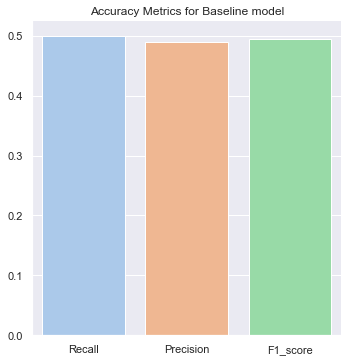

In [37]:
# define the baseline predictions first
yhat_baseline = np.full((y_test.shape[0], 1), major_class)

# evaluate baseline metrics using the previously defined function
plot_metrics(y_test, yhat_baseline, 'Baseline')

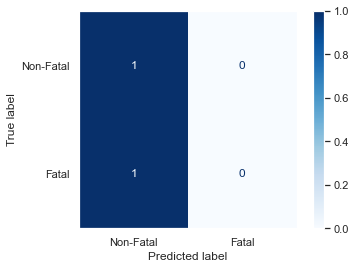

In [38]:
plot_confusion_matrix(y_test, yhat_baseline)

The result of assuming all cases are Non-Fatal is evident in our baseline model, the model does not predict a single Fatal case, and therefore the resultant f1-macro score is almost 0.5 (it would be close to 1 if it were micro-averaged due to class imbalance)

### Random Forest

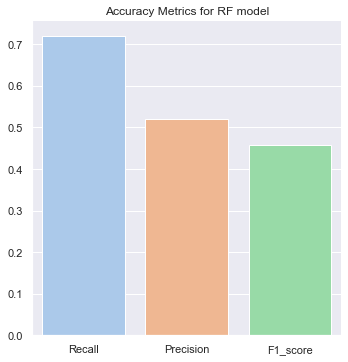

In [39]:
# get the predictions for the random forest
yhat_RF = best_rf.predict(x_test_new)

# call the plot metrics function
plot_metrics(y_test, yhat_RF, 'RF')

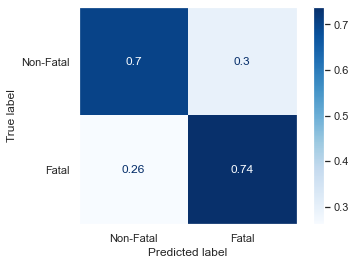

In [40]:
# plot the confusion matrix
plot_confusion_matrix(y_test, yhat_RF)

The performance of our Random Forest is positive, with our model predicting the true labels 70% of the time in both Fatal and Non-Fatal cases. Further the model labels almost every 3 in 4 True Fatal cases as Fatal (74%).

### Support-Vector-Machine

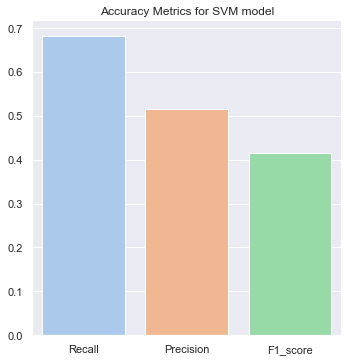

In [41]:
# get predictions for the svm prediction
yhat_SVM = best_svm.predict(x_test_new)

# get the metrics
plot_metrics(y_test, yhat_SVM, 'SVM')

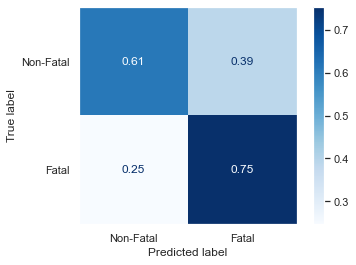

In [42]:
plot_confusion_matrix(y_test, yhat_SVM)

### 

We see good performance for the SVM on distinguishing Fatal cases. 3/4 of Fatal cases are correctly classified as such. There is less accuracy for non-fatal, however, we meet our objective of having a model that is good at understanding and predicting Fatal cases.

### Logistic Regression

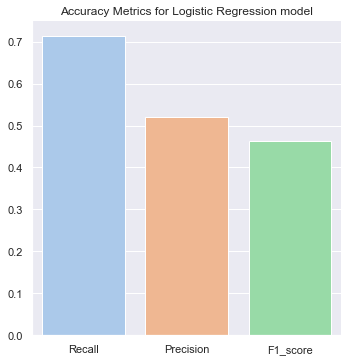

In [43]:
# get the predictions for the logistic regression
yhat_lr = best_lr.predict(x_test_new)

# plot the accuracy metrics
plot_metrics(y_test, yhat_lr, 'Logistic Regression')

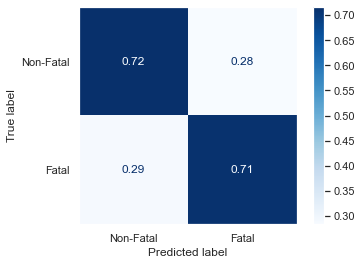

In [44]:
# plot the confusion matrix
plot_confusion_matrix(y_test, yhat_lr)

The Logistic Regression also has good scores, making accurate predictions. As we observe from some of our other models, our Logistic Regression model also predicts the true label over 70% of the time (when we normalize based on class and not for the whole dataset)

### Ada Boost

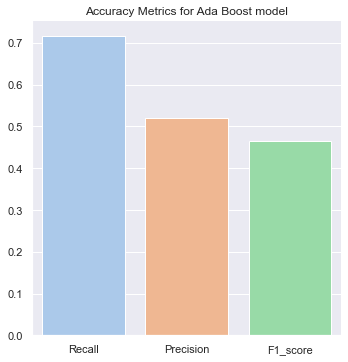

In [45]:
# get the predictions for the Adaptive Boosting
yhat_ada = best_ada.predict(x_test_new)

# plot the accuracy metrics
plot_metrics(y_test, yhat_ada, 'Ada Boost')

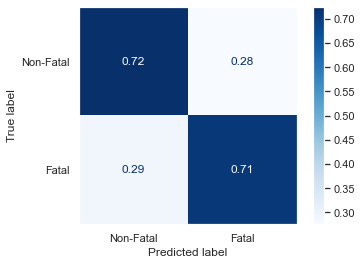

In [46]:
plot_confusion_matrix(y_test, yhat_ada)

The results of our adaptive boosting method is quite similar to the Logistic regression

### Multi-Layer Perceptron

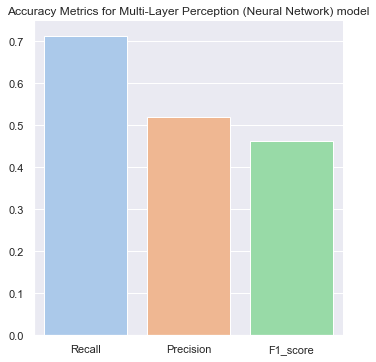

In [47]:
# get the predictions for the Neural Network
yhat_mlp = best_mlp.predict(x_test_new)

# plot the accuracy metrics
plot_metrics(y_test, yhat_mlp, 'Multi-Layer Perception (Neural Network)')

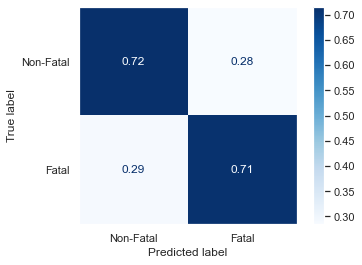

In [48]:
# plot the confusion matrix
plot_confusion_matrix(y_test, yhat_mlp)

We note that the predictions for our Logistic Regression, ADA Boost, and even the Neural Network model is almost the same. This may be indicative of all 3 of the models learning similarly from the data. We can identify this further as we explore feature importance and weights in the next section. 

### 5.2 Analyse Models for Insights

In this section we will be:
- Identifying feature importances with built-in Random Forest
- Identifying feature relevance in other models using Coefficients to rank them
- Identifying most important features of our best models using 'permutation importance' technique

### 5.2.1 Feature Importance

#### Random Forest

In [ ]:
# get the feature importances
rf_importance = best_rf.feature_importances_
feat_label = x_train.columns
indices = np.argsort(rf_importance)[::-1]

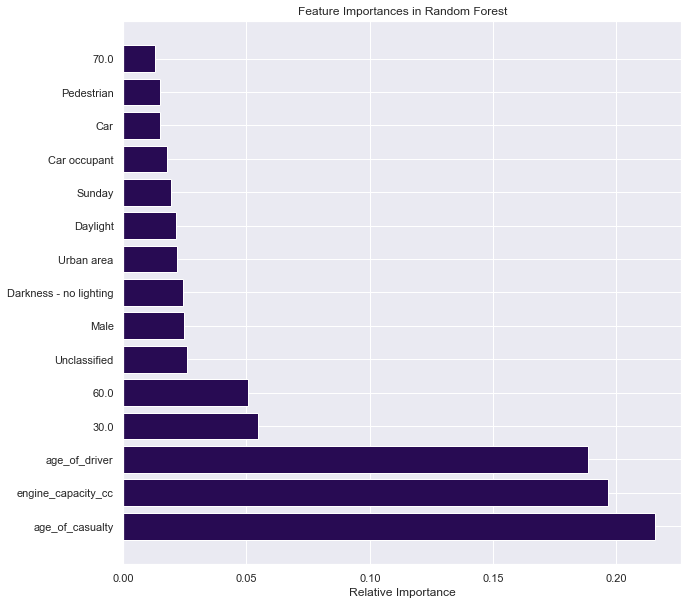

In [ ]:
# set number of features 
num_features = 15

# set the theme for sns
sns.set_theme(style='darkgrid', palette='inferno')

# plot the relative importances
plt.figure(figsize=(10,10))
plt.title('Feature Importances in Random Forest')

# only visualize the top 15 features
plt.barh(range(num_features), rf_importance[indices[:num_features]], align='center')
plt.yticks(range(num_features), [feat_label[i] for i in indices[:num_features]])
plt.xlabel('Relative Importance')
plt.show()

#### Ada-Boost

In [ ]:
# get the feature importances
ada_importance = best_ada.feature_importances_
feat_label = x_train.columns
indices = np.argsort(ada_importance)[::-1]

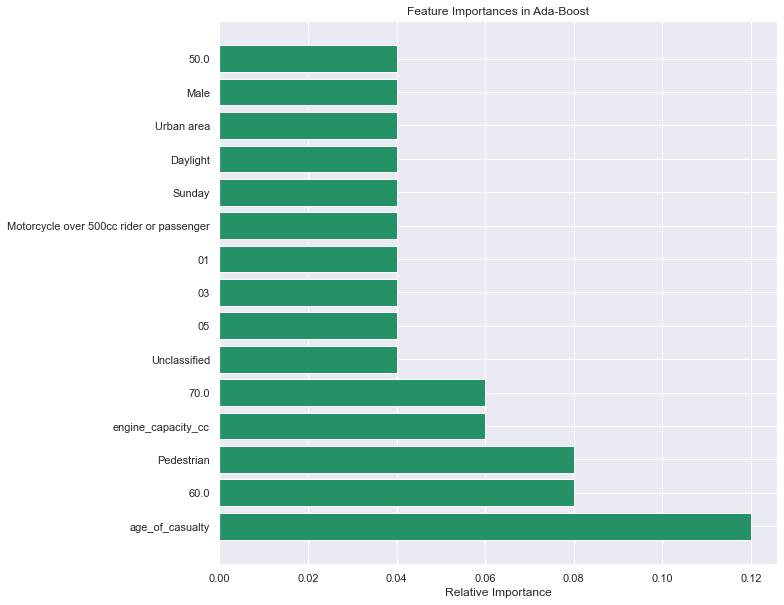

In [ ]:
# set number of features 
num_features = 15

# set the theme for sns
sns.set_theme(style='darkgrid', palette='summer')

# plot the relative importances
plt.figure(figsize=(10,10))
plt.title('Feature Importances in Ada-Boost')

# only visualize the top 15 features
plt.barh(range(num_features), ada_importance[indices[:num_features]], align='center')
plt.yticks(range(num_features), [feat_label[i] for i in indices[:num_features]])
plt.xlabel('Relative Importance')
plt.show()

### 5.2.2 Coefficients

Note: Measuring feat.importance by Coefficients is somewhat unreliable as larger coefficients do not necessarily imply that feature is more important. 
 - There may be issues with multi-collinearity.
 - Even in scaled data, coefficients may be larger by construction.

 
We will be using relative coefficient size as a proxy to merely identify any similarities with the methods where we use feature importance.

#### Support Vector Classifier

In [ ]:
# get the relative size of squared coefficients (biggest coefficients will be set as 1) 
svm_weights = (best_svm.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()
indices = np.argsort(svm_weights)[::-1]

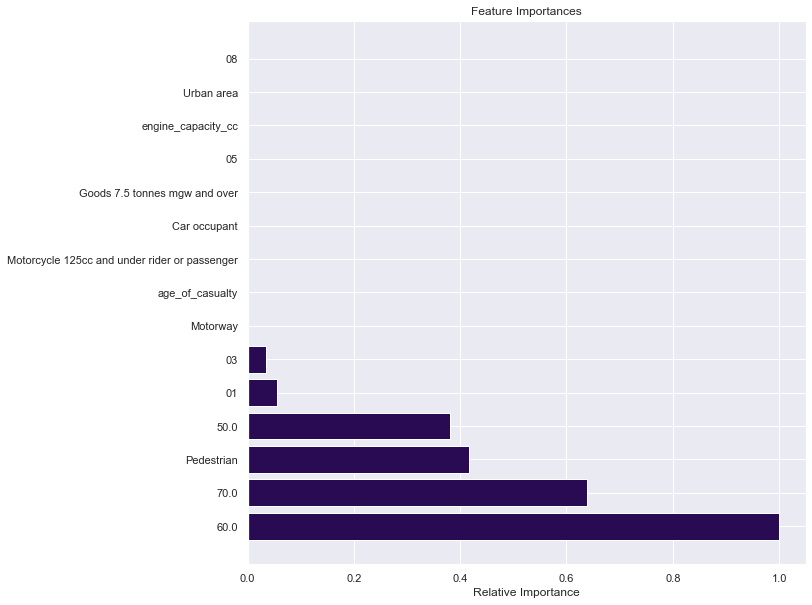

In [ ]:
# set number of features 
num_features = 15

# set the theme for sns
sns.set_theme(style='darkgrid', palette='inferno')

# plot the relative importances
plt.figure(figsize=(10,10))
plt.title('Feature Importances')

# only visualize the top 15 features
plt.barh(range(num_features), svm_weights[indices[:num_features]], align='center')
plt.yticks(range(num_features), [feat_label[i] for i in indices[:num_features]])
plt.xlabel('Relative Importance')
plt.show()

#### Logistic Regression

In [ ]:
# get the relative size of squared coefficients
lr_weights = (best_lr.coef_ ** 2).sum(axis=0)
lr_weights /= lr_weights.max()
indices = np.argsort(lr_weights)[::-1]

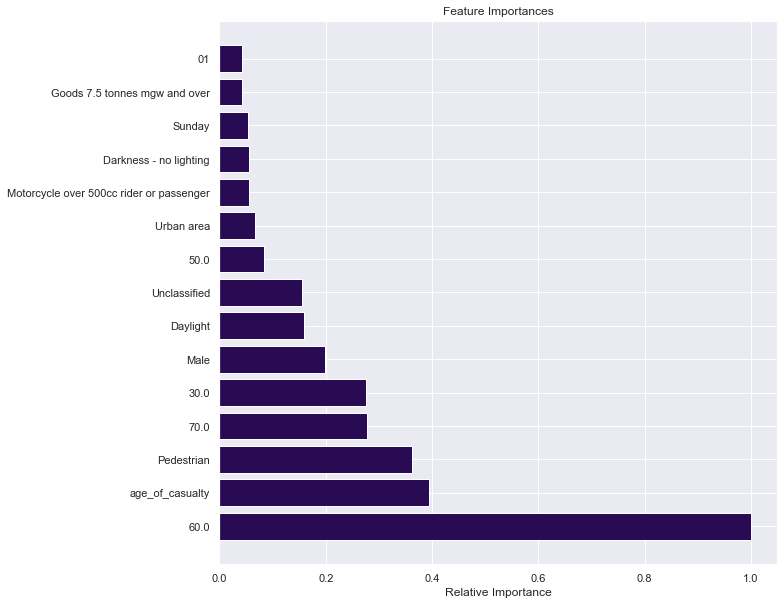

In [ ]:
# set number of features 
num_features = 15

# set the theme for sns
sns.set_theme(style='darkgrid', palette='inferno')

# plot the relative importances
plt.figure(figsize=(10,10))
plt.title('Feature Importances')

# only visualize the top 10 features
plt.barh(range(num_features), lr_weights[indices[:num_features]], align='center')
plt.yticks(range(num_features), [feat_label[i] for i in indices[:num_features]])
plt.xlabel('Relative Importance')
plt.show()

### 5.2.3 Permutation Importance

We will implement Permutation to assess feature importance for MLP models.  

By permutation importance, we measure the decrease in performance of the model by randomly shuffling the variable such that the relationship between the variable and target is broken.




In [ ]:
# import the permutation importance class
from sklearn.inspection import permutation_importance

# calculate the permutation feature importance for Multi-Layer Perceptron
mlp_importance = permutation_importance(best_mlp, x_test_new, y_test,
                                        n_repeats=15, random_state=7)

In [ ]:
# set the data required to plot 
indices = mlp_importance.importances_mean.argsort()[::-1]

# set the average importance values obtained from the mlp importance
mlpimportance = mlp_importance.importances_mean

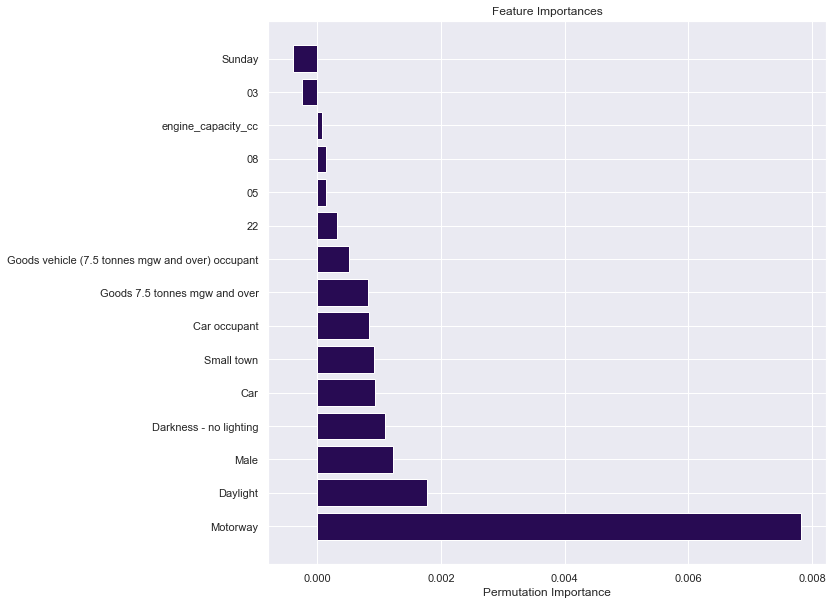

In [ ]:
# set number of features 
num_features = 15

# set the theme for sns
sns.set_theme(style='darkgrid', palette='inferno')

# plot the relative importances
plt.figure(figsize=(10,10))
plt.title('Feature Importances')

# only visualize the top 10 features
plt.barh(range(num_features), mlpimportance[indices[:num_features]], align='center')
plt.yticks(range(num_features), [feat_label[i] for i in indices[:num_features]])
plt.xlabel('Permutation Importance')
plt.show()

We observe that despite similar performance and classification accuracy with other models. Our MLP classifier actually makes predictions in a different way, or ranks importances differently, with Motorways being the most important factor.

## 6. Conclusions

The models we have built show encouraging results in our mission to study Fatal Accidents and their primary contributing factors. Good model prediction accuracy indicates that our models understand Fatal accidents well. Further most of our models agree on what are the factors that contribute most to a Fatal Accident.
 
- Many models indicate 60mph (and high speed limits in general) as more relevant to fatal accidents. This may be indicative of faster speeds leading to more dangerous accidents.

- However, our MLP model does not take high speed limits as being as important and instead takes Motorways as the most important element.

- We understand from general UK traffic regulations that motorways have a speed limit of 70mph. Therefore this difference may be due to correlation between the two variables (all motorways would also have speed limits of 70mph).

- With this information, we can hypothesize that either faster speeds lead to more Fatal accidents (in a likelihood sense), or accidents are more often Fatal when occurring on a motorway due to slower emergency response for instnace, as opposed to an accident in a metropolitan area. 

- Furthermore, we can also see that both the Random Forest and ADA Boost algorithm places significant importance on the Age of the Casualty. Which may be indicative of certain age groups either being more likely to be involved in a Fatal accident (behavior wise) or are more vulnerable (health wise)

Our models have also identified additional features which may be relevant, such as engine capacity (faster cars), or time of day (late night) which may all be relevant matters for the Department of Transport to consider when planning preventive measures.